**K-Nearest Neighbors**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [3]:
df = pd.read_csv('Customers.csv')
print(df.head())
print(df.info())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print('Training set size:', len(X_train))
print('Test set size:', len(X_test))

Training set size: 300
Test set size: 100


In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('Feature scaling applied to training and test sets.')

Feature scaling applied to training and test sets.


In [6]:
# Training the KNeighborsClassifier model on the Training set
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

print('KNN model trained.')

KNN model trained.


In [7]:
# Predicting a new result
new_prediction = classifier.predict(sc.transform([[30, 60000]]))

print('Predicted purchase decision for a new customer (1 = buy, 0 = not buy):', new_prediction[0])

Predicted purchase decision for a new customer (1 = buy, 0 = not buy): 0


In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [9]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [10]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.93


<ipython-input-11-a3171e17057d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


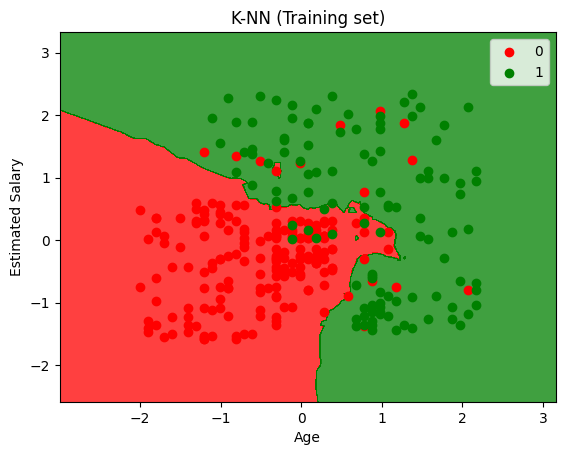

In [11]:
# Visualising the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In this visualization, the training set data points are plotted with their actual classifications (buy or not buy) in the feature space of Age vs. Estimated Salary. The background color represents the model's prediction regions (red for not buy, green for buy), indicating how the model classifies the feature space. Data points are colored according to their actual class, allowing us to see where the model's predictions align with the actual outcomes.

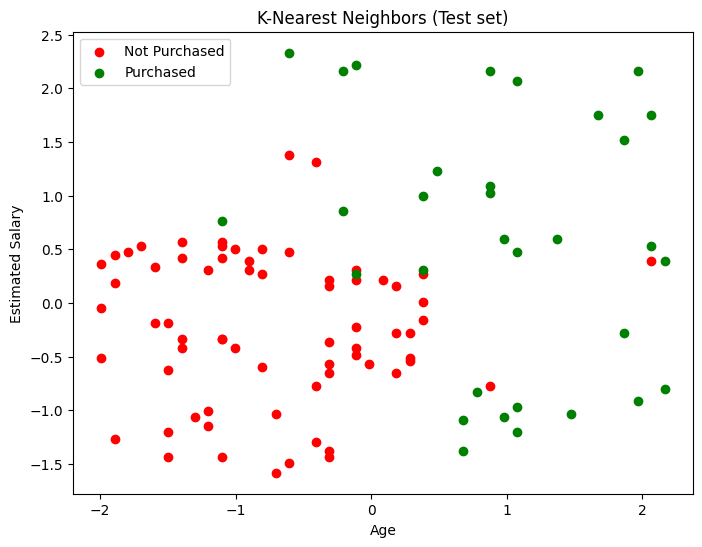

In [12]:
# Visualizing the Test set result
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color = 'red', label = 'Not Purchased')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color = 'green', label = 'Purchased')
plt.title('K-Nearest Neighbors (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The scatter plots show the distribution of data points based on age and estimated salary, with different colors representing the classes "Not Purchased" and "Purchased".